In [1]:
# 모듈 호출
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt 
plt.rc('font', family='Malgun Gothic')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/Othercomputers/내 노트북/07_PJT_final_01/01_clothes_classification

/content/drive/Othercomputers/내 노트북/07_PJT_final_01/01_clothes_classification


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255) # 스케일링만 진행
test_generator = test_datagen.flow_from_directory(
    './dataset/test',
    batch_size=10,      
    class_mode='categorical', 
    target_size=(224, 224),
    shuffle=False)

Found 278 images belonging to 4 classes.


In [5]:
# 모델 불러오기
from tensorflow.keras.models import load_model
model = load_model('./model/MobileNet.h5')

In [ ]:
Y_pred = model.predict(test_generator)
classes = test_generator.classes[test_generator.index_array]
y_pred = np.argmax(Y_pred, axis=1) 

result_dict = dict(map(reversed, test_generator.class_indices.items()))
class_names = list(result_dict.values())

print('-- Confusion Matrix --')
print(confusion_matrix(classes, y_pred))

print('-- Classification Report --')
print(classification_report(classes, y_pred, target_names=class_names))

-- Confusion Matrix --
[[21 23 13 13]
 [ 1 39  6 23]
 [ 0 21 18 30]
 [ 2 17 10 41]]
-- Classification Report --
              precision    recall  f1-score   support

     bottoms       0.88      0.30      0.45        70
   one-piece       0.39      0.57      0.46        69
   outerwear       0.38      0.26      0.31        69
        tops       0.38      0.59      0.46        70

    accuracy                           0.43       278
   macro avg       0.51      0.43      0.42       278
weighted avg       0.51      0.43      0.42       278



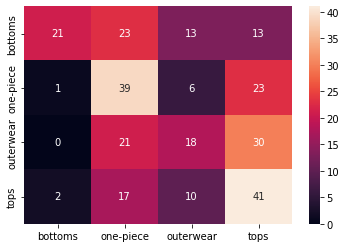

In [ ]:
sns.heatmap(confusion_matrix(classes, y_pred), annot=True, fmt='d',
            xticklabels=['bottoms', 'one-piece', 'outerwear', 'tops'] ,
            yticklabels=['bottoms', 'one-piece', 'outerwear', 'tops'] )

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


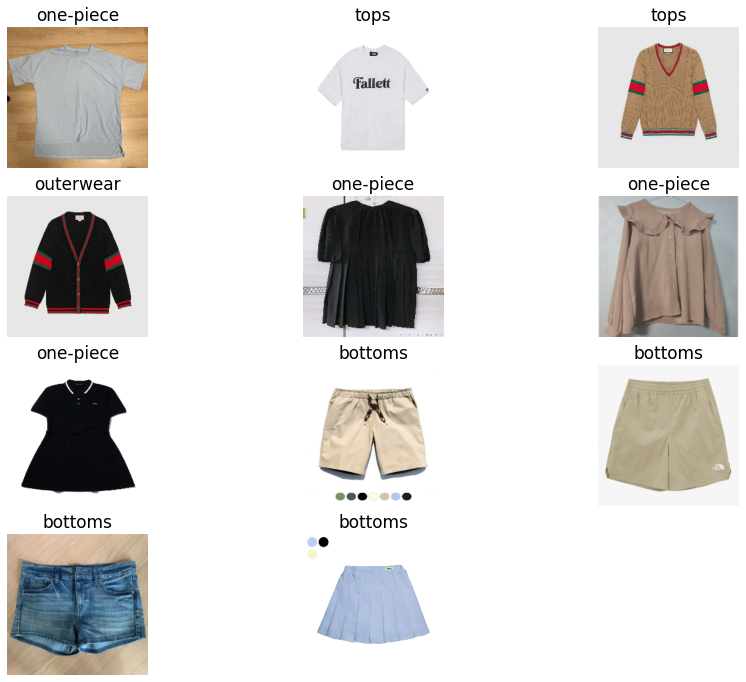

In [9]:
# 직접 찍은 음료 이미지로 예측 결과 확인

class_dict = {0:'bottoms',1:'one-piece', 2:'outerwear', 3:'tops'}

fig = plt.figure(figsize=(15,15))
i=0
for img in glob.glob('./dataset/test1/*'):
    ax = plt.subplot(4,3,i+1) 
    test_img = cv2.imread(img)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    test_img = cv2.resize(test_img,(224,224))/255.0
    test_img_input = test_img.reshape((1,)+test_img.shape)
    pred = model.predict(test_img_input)
    pred_class = class_dict[np.argmax(pred, axis=1)[0]]
    ax.imshow(test_img)
    ax.axis('off')
    ax.set_title(f'{pred_class}',fontsize=17)
    i += 1

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.7, wspace=0.2, hspace=0.2)
plt.show()

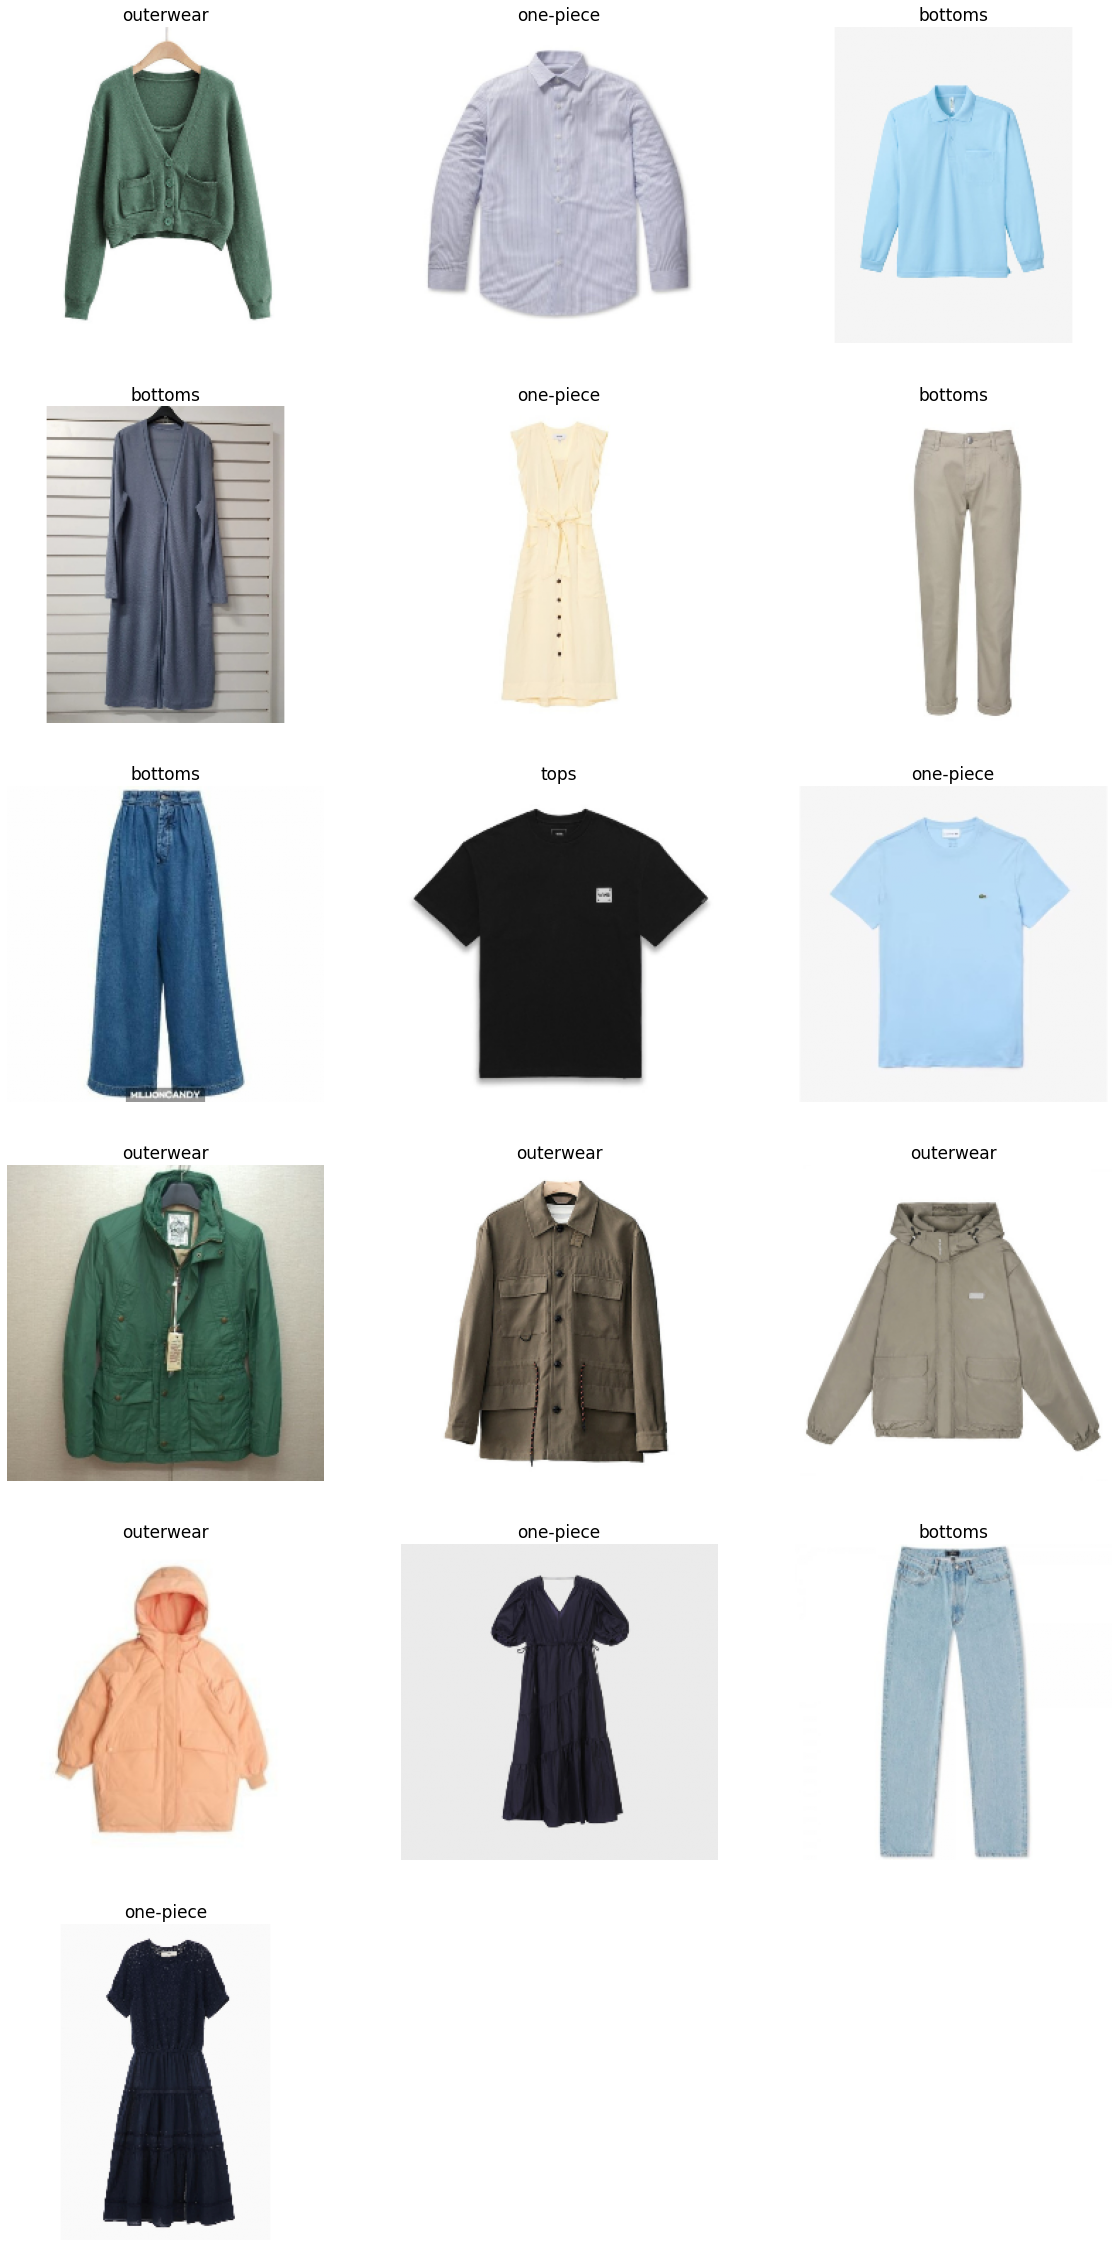

In [10]:
# 직접 찍은 음료 이미지로 예측 결과 확인

class_dict = {0:'bottoms',1:'one-piece', 2:'outerwear', 3:'tops'}

fig = plt.figure(figsize=(20,60))
i=0
for img in glob.glob('./dataset/test2/*'):
    ax = plt.subplot(7,3,i+1) 
    test_img = cv2.imread(img)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    test_img = cv2.resize(test_img,(224,224))/255.0
    test_img_input = test_img.reshape((1,)+test_img.shape)
    pred = model.predict(test_img_input)
    pred_class = class_dict[np.argmax(pred, axis=1)[0]]
    ax.imshow(test_img)
    ax.axis('off')
    ax.set_title(f'{pred_class}',fontsize=17)
    i += 1
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.7, wspace=0.2, hspace=0.2)
plt.show()

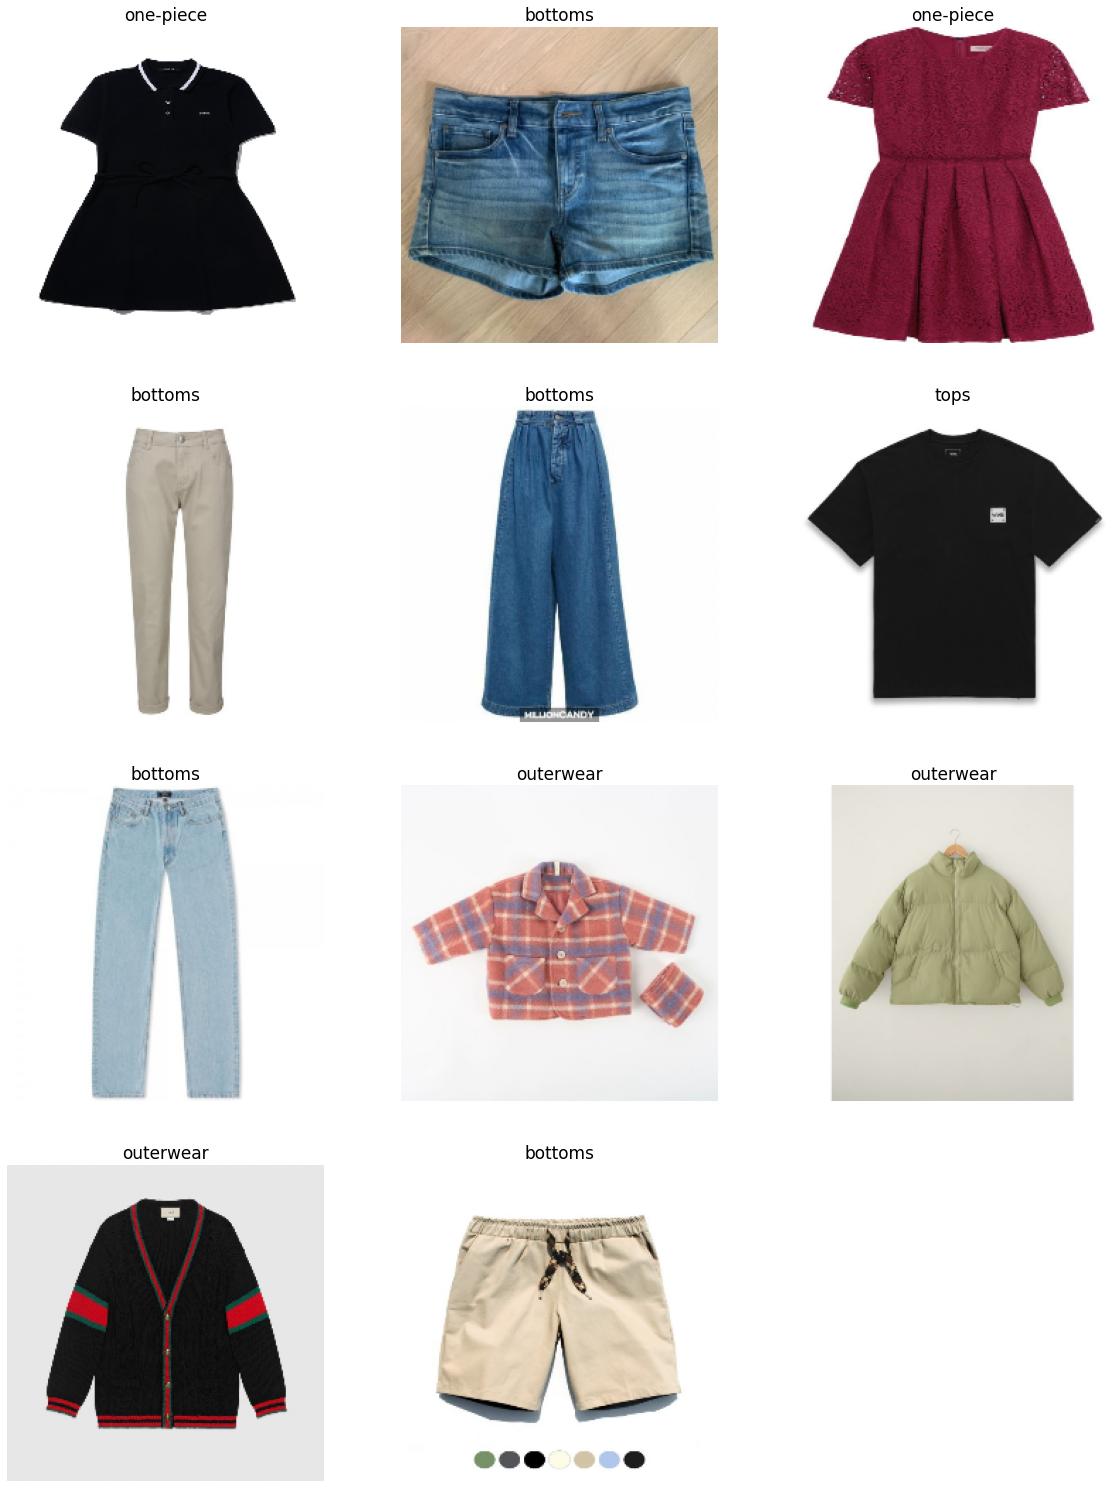

In [11]:
# 직접 찍은 음료 이미지로 예측 결과 확인

class_dict = {0:'bottoms',1:'one-piece', 2:'outerwear', 3:'tops'}

fig = plt.figure(figsize=(20,60))
i=0
for img in glob.glob('./dataset/test3/*'):
    ax = plt.subplot(7,3,i+1) 
    test_img = cv2.imread(img)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    test_img = cv2.resize(test_img,(224,224))/255.0
    test_img_input = test_img.reshape((1,)+test_img.shape)
    pred = model.predict(test_img_input)
    pred_class = class_dict[np.argmax(pred, axis=1)[0]]
    ax.imshow(test_img)
    ax.axis('off')
    ax.set_title(f'{pred_class}',fontsize=17)
    i += 1
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.7, wspace=0.2, hspace=0.2)
plt.show()